<a href="https://colab.research.google.com/github/cgdrawfps/cgdrawfps.github.io/blob/master/Autoencoers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Syllabus**


**Machine Learning**
*  Convolutions
  * 1 D
  * Dilated
  * Seperable
  * Time-Depth
*   Autoencoders
  * VAE
  * PCA
  * Sparse
* Fundamentals
  * Loss
  * Regularization
  * Dropout
* Networks
  * Transformer
  * U-net
  * VGG
* Optimization
  * Adam
  * SGD
  * Autograd

**NLP**
* Language Modelling
  * Transformers
  * Bert
* Speech Recognition
  * Seq2seq
  * CTC
  * WFSTS

**Computer Vision**

**Programming**
* Python
  * Broadcasting
  * Currying
  * Lambda
  * Comprehensions
* C++
* Objective C
* Swift
* Algorithms
  * B-trees
  * Recursion
  * Edit distances
**Links**

https://github.com/huggingface/transformers
https://mlexplained.com/2019/01/07/paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained/

**Bert**

 * Uses transformer instead of RNN
 * Uses wordpiece instead of wors - reduce vocab size
 * Bidirectional 
 * Mask out random words instead of next word and next sentence prediction training
 * Fine tune to task

 **MelGAN**
  * Paper  https://arxiv.org/abs/1910.06711
  * Implementation https://github.com/seungwonpark/melgan


**Acoustic Modelling** 
  * Transformer https://arxiv.org/pdf/1910.01493.pdf
  * CTC 

**Courses**
  * https://fleuret.org/ee559/


**Recent Advances in Acoustic Modelling**

https://arxiv.org/pdf/1910.12367.pdf


In [5]:
!pip install torchvision
import torch
import torchvision
import torch.nn as nn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.datasets as ds
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
train_data = ds.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = ds.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

batch_size = 100

train_loader = torch.utils.data.DataLoader(
                 dataset=train_data,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_data,
                batch_size=1,
                shuffle=False)

In [0]:
class AutoEncoder(nn.Module):
  def __init__(self, num_pixels, num_hidden):
    super(AutoEncoder, self).__init__()
    self.enc1 = nn.Linear(num_pixels, num_hidden * 2)
    self.enc2 = nn.Linear(num_hidden * 2, num_hidden)
    self.dec = nn.Linear(num_hidden, num_pixels)

  def forward(self, X):
    h1 = F.relu(self.enc1(X))
    h2 = F.relu(self.enc2(h1))
    return F.relu(self.dec(h2))

  def gumbel_softmax(logits, temperature, hard=False):
    pass

In [0]:
class CNNAutoEncoder(nn.Module):
  def __init__(self):
    super(CNNAutoEncoder, self).__init__()
    ## encoder layers ##
    self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
    self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    
    ## decoder layers ##
    ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
    self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
    self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
    
  def forward(self, X):
    ## encode ##
    # add hidden layers with relu activation function
    # and maxpooling after
    x = F.relu(self.conv1(X))
    x = self.pool(x)
    # add second hidden layer
    x = F.relu(self.conv2(x))
    x = self.pool(x)  # compressed representation
    
    ## decode ##
    # add transpose conv layers, with relu activation function
    x = F.relu(self.t_conv1(x))
    # output layer (with sigmoid for scaling from 0 to 1)
    x = F.sigmoid(self.t_conv2(x))
    return x


In [0]:
#ae = AutoEncoder(784,20)
ae = CNNAutoEncoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr = 0.01)
for epoch in range(10):
    # trainning
    ave_loss = 0
    for batch_idx, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        #if use_cuda:
        #    x, target = x.cuda(), target.cuda()
        #X = Variable(X).view(-1, 784)
        out = ae(X)
        loss = criterion(out, X)
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
out.shape

torch.Size([100, 1, 28, 28])

In [0]:
for batch_idx, (X, y) in enumerate(test_loader):
  y = ae.forward(X)
  loss = criterion(X, y)
y = y.view(28,28).detach().numpy()
X = X.view(28,28).detach().numpy()



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


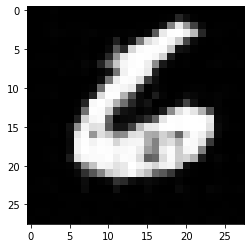

In [0]:
plt.figure(figsize=(20, 4))
plt.imshow(y)
plt.gray()

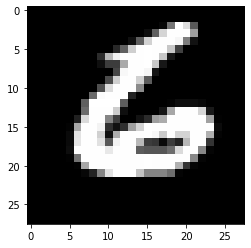

In [0]:
plt.figure(figsize=(20, 4))
plt.imshow(X)
plt.gray()

<Figure size 1440x288 with 0 Axes>

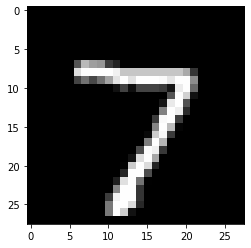

In [62]:
x = torch.tensor([[[0., 0., 1., 0., 0., 0., 0.]]])
k = torch.tensor([[[1., 2., 3.]]])
y = F.conv_transpose1d(x, k)
x = torch.tensor([[[1., 1., 1., 1., 1., 1., 1.]]])
m = nn.ConvTranspose1d(1, 1, kernel_size=3, stride=1, padding=0, dilation=1)
m.bias.data.zero_()
m.weight.data.copy_(torch.tensor([ 1, 1, 1 ]))
y = m(x)
print(y.shape)
print(y)

torch.Size([1, 1, 9])
tensor([[[1., 2., 3., 3., 3., 3., 3., 2., 1.]]], grad_fn=<SqueezeBackward1>)


Transposed Convolutions

$\sum_x$
